In [ ]:
import os
import requests

client_id = "50ab6020042e424f8f9a7c11c8da4cef"
client_secret = "p8e-irx6-uE2LqLRmC1a_ftOpgVwE_pvUBIw"

def main():
    access_token = retrieve_access_token()
    generate_image(access_token)

def retrieve_access_token():

    token_url = 'https://ims-na1.adobelogin.com/ims/token/v3'
    payload = {
        'grant_type': 'client_credentials',
        'client_id': client_id,
        'client_secret': client_secret,
        'scope': 'openid,AdobeID,session,additional_info,read_organizations,firefly_api,ff_apis'
    }

    response = requests.post(token_url, data=payload)
    response.raise_for_status()
    token_data = response.json()
    print("Access Token Retrieved")
    return token_data['access_token']

def generate_image(access_token):

    headers = {
        'Content-Type': 'application/json',
        'Accept': 'application/json',
        'x-api-key': client_id,
        'Authorization': f'Bearer {access_token}'
    }

    data = {
        'prompt': 'a realistic illustration of a cat coding',  # Replace with your actual prompt
    }

    response = requests.post(
        'https://firefly-api.adobe.io/v3/images/generate-async',
        headers=headers,
        json=data
    )
    response.raise_for_status()
    job_response = response.json()
    print("Generate Image Response:", job_response)

    # Access the generated image URL
    image_url = job_response['outputs'][0]['image']['url']
    print(f"You can view the generated image at: {image_url}")

if __name__ == '__main__':
    main()

In [4]:
client_id = "c2e303e975b4411f8c6b04f3cfc47e23"
client_secret = "p8e-ndlKdIpt9ajGDsb3jud2-WClgZhf_DHH"

token_url = 'https://ims-na1.adobelogin.com/ims/token/v3'
payload = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
    'scope': 'openid,AdobeID,session,additional_info,read_organizations,firefly_api,ff_apis'
}

response = requests.post(token_url, data=payload)
response.raise_for_status()
token_data = response.json()
print("Access Token Retrieved")

Access Token Retrieved


In [26]:
from google import genai
from google.genai import types

# Initialize the client
client = genai.Client(api_key="")

# Set the model ID
PRO_MODEL_ID = "gemini-3-pro-image-preview"

prompt = "Create a photorealistic image of a siamese cat with a green left eye and a blue right one"
aspect_ratio = "16:9" # "1:1","2:3","3:2","3:4","4:3","4:5","5:4","9:16","16:9" or "21:9"

response = client.models.generate_content(
    model=PRO_MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image'], # Or just ['Image']
        image_config=types.ImageConfig(
            aspect_ratio=aspect_ratio,
        )
    )
)

# Save the image
for part in response.parts:
    if image:= part.as_image():
        image.save("cat.png")

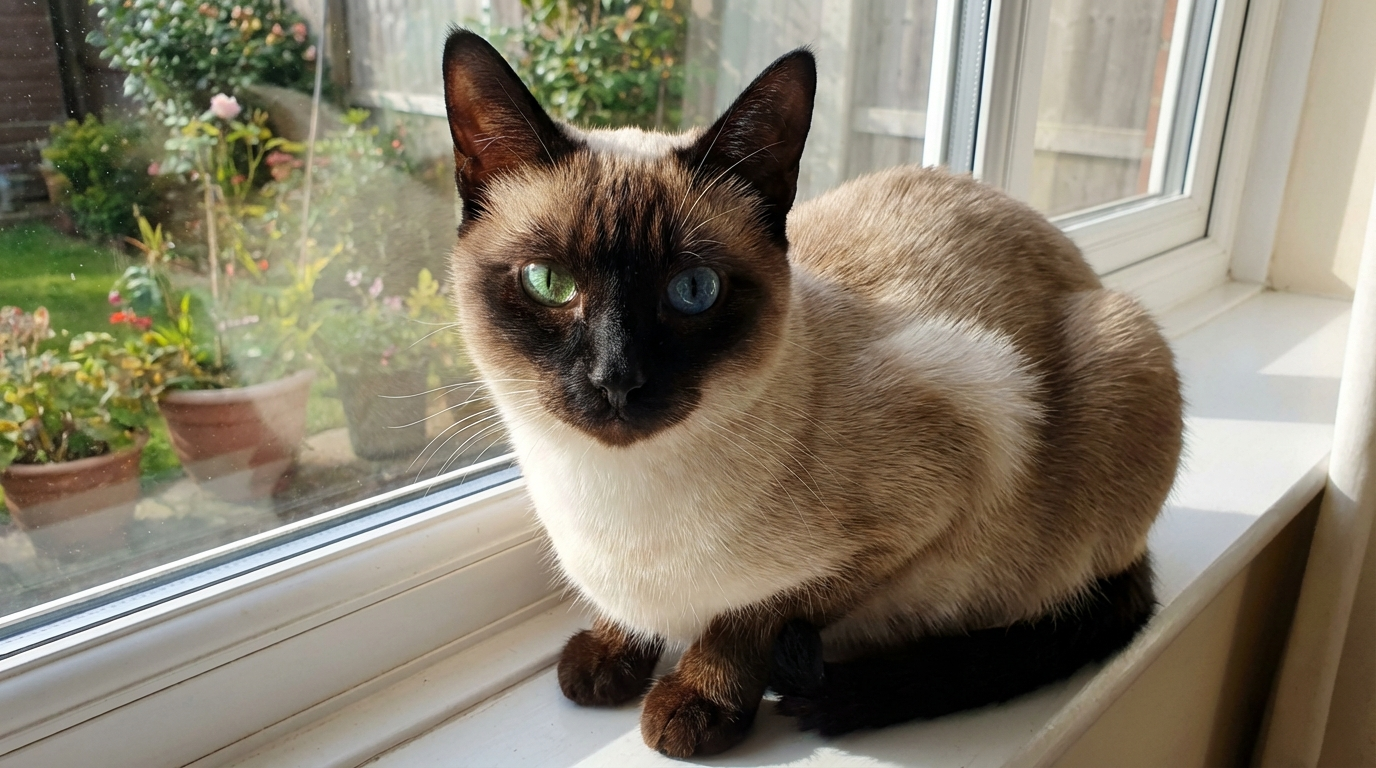

In [27]:
from IPython.display import Image
Image('/content/cat.png')